In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
train_filename = "adult.data"

In [4]:
column_names = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','target']

In [5]:
data = pd.read_csv(train_filename, names=column_names, skiprows=1, header=None)

In [6]:
data.shape

(32560, 15)

In [7]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [8]:
data.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [9]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
target            0
dtype: int64

In [10]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
# CATEGORICAL
catFeatures = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country']

In [12]:
# Convert categorical variable into dummy/indicator variables
df_cat = pd.get_dummies(data[catFeatures])

In [13]:
# concat dummy/indicator variables# concat 
data = pd.concat([data, df_cat], axis=1)

In [14]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0,0,0,0,0,0,0,1,0,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,0,0,0,0,0,0,0,1,0,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,0,0,0,0,0,0,0,1,0,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,0,0,0,0,0,0,0,0,0,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,...,0,0,0,0,0,0,0,1,0,0


In [15]:
data.target.unique()

array([' <=50K', ' >50K'], dtype=object)

In [16]:
# drop useless categorical column
data.drop(catFeatures, axis=1,inplace=True)

In [17]:
#INTEGER
intFeatures = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']

In [18]:
# integer features scaling
scaler = MinMaxScaler()
data[intFeatures] = scaler.fit_transform(data[intFeatures])

In [19]:
# split features and label(class)
dfX = data.drop(['target'], axis=1)
dfY = pd.get_dummies(data['target'])

In [20]:
# get features names
fNames = dfX.columns

In [21]:
# get target names
tNames = dfY.columns

In [22]:
features = dfX.values
label = dfY.values

In [23]:
#biasPad = np.ones((features.shape[0],1), dtype=features.dtype)
#features = np.concatenate((features,biasPad), axis=1)

In [24]:
XTrain, XTest, YTrain, YTest = train_test_split(features, label, train_size=0.75, test_size=0.25, random_state=7)

XTest = features[splitIdx:,:]
XTrain = features[:splitIdx,:]

YTest = label[splitIdx:,:]
YTrain = label[:splitIdx,:]

In [25]:
XTest.shape

(8140, 108)

In [26]:
XTrain.shape

(24420, 108)

In [27]:
YTest.shape

(8140, 2)

In [28]:
YTrain.shape

(24420, 2)

In [29]:
YTest

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [0, 1],
       [1, 0]], dtype=uint8)

In [30]:
def softmax(x):
    shifted_x = x - np.max(x, axis=1, keepdims=True)
    f = np.exp(shifted_x)
    p = f / np.sum(f, axis=1, keepdims=True)

    return p

def relu(x):
    result = np.maximum(0.0, x)

    return result

def d_relu(a):
    d = np.zeros_like(a)
    d[np.where(a > 0.0)] = 1.0

    return d

def tanh(x):

    return np.tanh(x)

def d_tanh(x):

    return 1.0 - x ** 2

In [31]:
# https://deepnotes.io/softmax-crossentropy
def cross_entropy(p, t):
    s = t.shape[0]
    log_likelihood = -np.log(p[range(s), np.argmax(t, axis=1)])

    return np.sum(log_likelihood) / s


def d_cross_entropy(g, y):
    m = y.shape[0]
    g[range(m), np.argmax(y, axis=1)] -= 1
    g = g / m

    return g


In [32]:
class NN:
    def __init__(self, ni, nh1, nh2, no):
        self.ni = ni
        self.nh1 = nh1
        self.nh2 = nh2
        self.no = no

        # He Initialization
        # self.wih1 = np.random.rand(inputCount, hiddenCount1)*np.sqrt(2./inputCount)

        # Xavier Parameter Initialization
        self.wih1 = np.random.rand(ni, nh1) * np.sqrt(6) / (np.sqrt(ni * nh1))
        self.wh1h2 = np.random.rand(nh1, nh2) * np.sqrt(6) / (np.sqrt(nh1 * nh2))
        self.wres = np.random.rand(ni, no) * np.sqrt(6) / (np.sqrt(ni * no))
        self.wout = np.random.rand(nh2, no) * np.sqrt(6) / (np.sqrt(nh2* no))

        self.bh1 = np.random.rand(nh1) * np.sqrt(6) / (np.sqrt(nh1))
        self.bh2 = np.random.rand(nh2) * np.sqrt(6) / (np.sqrt(nh2))
        self.bo = np.random.rand(no) * np.sqrt(6) / (np.sqrt(no))
        
        self.alpha = 0.01


    def feedFwd(self, features):
        ai = features.copy()
        ah1 = tanh(np.dot(ai, self.wih1) + self.bh1)
        ah2 = relu(np.dot(ah1, self.wh1h2) + self.bh2)
        ao = tanh(np.dot(ah2, self.wout) + np.dot(ai, self.wres) + self.bo)

        return ai, ah1, ah2, ao


    def backProp(self, ai, ah1, ah2, ao, y, batchSize=1):

        delOut = d_cross_entropy(ao, y)
        delHidden2 = delOut.dot(self.wout.T) * d_relu(ah2)
        delHidden1 = delHidden2.dot(self.wh1h2.T) * d_tanh(ah1)

        self.wout -= self.alpha * ah2.T.dot(delOut)/batchSize
        self.wres -= self.alpha * ai.T.dot(delOut)/batchSize
        self.wh1h2 -= self.alpha * ah1.T.dot(delHidden2)/batchSize
        self.wih1 -= self.alpha * ai.T.dot(delHidden1)/batchSize

        self.bo -= self.alpha * np.sum(delOut, axis=0)/batchSize
        self.bh2 -= self.alpha * np.sum(delHidden2, axis=0)/batchSize
        self.bh1 -= self.alpha * np.sum(delHidden1, axis=0)/batchSize

    def fit(self, X, y, batchSize=1, alpha=0.1):
        self.alpha = alpha
        ai, ah1, ah2, ao = self.feedFwd(X)
        self.out_error = cross_entropy(ao, y)
        self.backProp(ai, ah1, ah2, ao, y, batchSize=1)

    def predict(self, X):
        ai, ah1, ah2, ao = self.feedFwd(X)
        return ao


In [33]:
def accuracy_metric(YTest, y_pred):
    actual = y_pred.copy()
    predicted = YTest.copy()
    actual = np.argmax(actual, axis=1)
    predicted = np.argmax(predicted, axis=1)

    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1

    return correct / float(len(actual)) * 100.0

In [34]:
def train(model, X, Y, iteration=1000, alpha=0.001, batchSize=1, beta=0.099, decayRate=0.0005):
    errorTimeline = []
    epochList = []
    accur = []

    # train it for iteration number of epoch
    for epoch in range(iteration):

        # for each mini batch
        for i in range(0, X.shape[0], batchSize):
            # split the dataset into mini batches
            batchSplit = min(i + batchSize, X.shape[0])
            XminiBatch = X[i:batchSplit, :]
            YminiBatch = Y[i:batchSplit]

            # calculate a forwasd pass through the network
            ai, ah1, ah2, ao = model.feedFwd(XminiBatch)

            # calculate mean squared error
            error = 0.5 * np.sum((YminiBatch - ao) ** 2) / batchSize
            # print error

            # backprop and update weights
            model.backProp(ai, ah1, ah2, ao, YminiBatch, batchSize=1)
            y_pred = model.predict(XTest)
            acc = accuracy_metric(y_pred, YTest)

        # after every 50 iteration decrease momentum and learning rate
        # decreasing momentum helps reduce the chances of overshooting a convergence point
        step = 1
        if epoch % step == 0 and epoch > 0:
            model.alpha *= 1. / (1. + (decayRate * epoch))
            #beta *= 1. / (1. + (decayRate * epoch))
            # Store error for ploting graph
            errorTimeline.append(error)
            epochList.append(epoch)
            accur.append(acc)
            print('Epoch :', epoch, ', Error :', error, ', alpha :', model.alpha)

    return epochList, errorTimeline, accur

In [35]:
model = NN(ni=XTrain.shape[1], nh1=35, nh2=35, no=YTrain.shape[1])

In [36]:
iteration = 30
alpha = 0.001
batch_size = 20

In [37]:
epochList, error_list,  accuracy_list = train(model, XTrain, YTrain, iteration=iteration, alpha=alpha, batchSize=batch_size, beta=0.099, decayRate=0.0005)

Epoch : 1 , Error : 0.15554956217382537 , alpha : 0.009995002498750625
Epoch : 2 , Error : 0.15294189503430522 , alpha : 0.009985017481269357
Epoch : 3 , Error : 0.15174430316140117 , alpha : 0.009970062387687825
Epoch : 4 , Error : 0.15091335884620014 , alpha : 0.009950162063560702
Epoch : 5 , Error : 0.15018667323138607 , alpha : 0.009925348691831124
Epoch : 6 , Error : 0.14929988057908897 , alpha : 0.009895661706710992
Epoch : 7 , Error : 0.14845498161795545 , alpha : 0.009861147689796703
Epoch : 8 , Error : 0.14759456266900964 , alpha : 0.009821860248801497
Epoch : 9 , Error : 0.14673211367364325 , alpha : 0.009777859879344448
Epoch : 10 , Error : 0.14582310630377132 , alpha : 0.009729213810292984
Epoch : 11 , Error : 0.14476726079445731 , alpha : 0.009675995833210327
Epoch : 12 , Error : 0.14375345412060114 , alpha : 0.00961828611651126
Epoch : 13 , Error : 0.14270586962381113 , alpha : 0.009556171004978896
Epoch : 14 , Error : 0.14156887828610473 , alpha : 0.009489742805341508
Ep

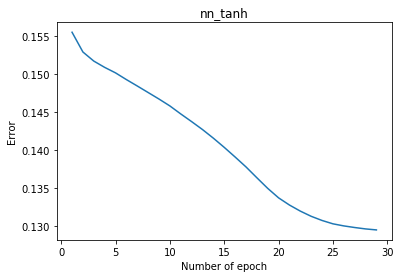

In [42]:
#plot graph
plt.title('nn_tanh')
plt.plot(epochList, error_list)
plt.xlabel('Number of epoch')
plt.ylabel('Error')
plt.savefig('loss-function_tanh.png')

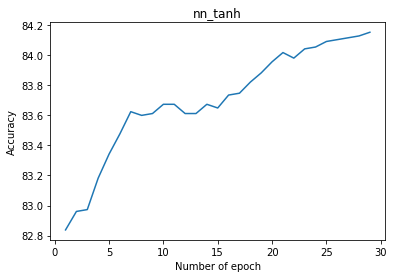

In [43]:
#plot graph
plt.title('nn_tanh')
plt.plot(epochList, accuracy_list)
plt.xlabel('Number of epoch')
plt.ylabel('Accuracy')
plt.savefig('Accuracy_tanh.png')

In [44]:
#get output for test features
_, _, _, predOutput = model.feedFwd(XTest)

In [45]:
count = np.sum(np.argmax(predOutput,axis=1) == np.argmax(YTest,axis=1))

In [46]:
#print accuracy
print('Accuracy : ',(float(count)/float(YTest.shape[0])))

Accuracy :  0.8415233415233415
